In [2]:
#---Subplots---

In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

plt.subplot?
#first argument: # of rows
#second: # of columns
#third: plot number

<IPython.core.display.Javascript object>


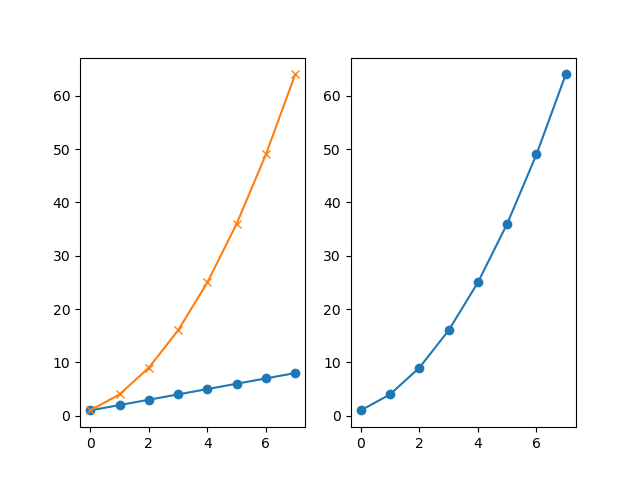

In [5]:
#if we want to create two plot side by side, we call subplot with parameters 1,2,1 (one row with two columns and first axis as
#current)
plt.figure()
plt.subplot(1, 2, 1)

linear_data = np.array([1,2,3,4,5,6,7,8])

plt.plot(linear_data, '-o')

In [6]:
exponential_data = linear_data**2

plt.subplot(1, 2, 2)
plt.plot(exponential_data, '-o')

In [7]:
#the norm is to store the axis object that you get back from the subplot, but you can call subplot again
#to put exponential on the linear graph
plt.subplot(1, 2, 1)
plt.plot(exponential_data, '-x')

<IPython.core.display.Javascript object>


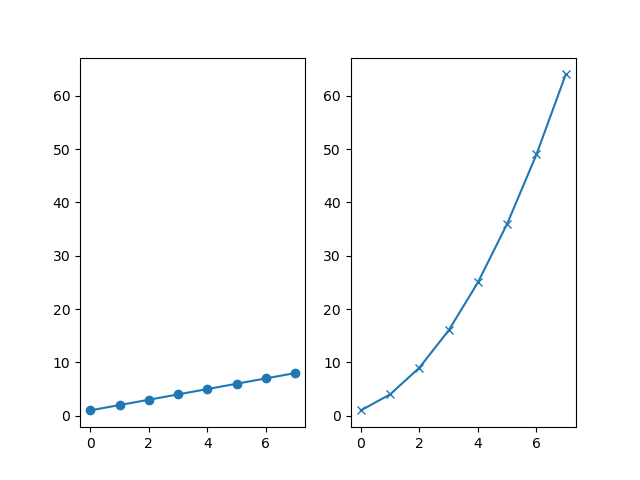

In [8]:
#cleaning the example above
plt.figure()
#storing in ax1
ax1 = plt.subplot(1, 2, 1)
plt.plot(linear_data, '-o')
#we want to share the y axis
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
plt.plot(exponential_data, '-x')

<IPython.core.display.Javascript object>


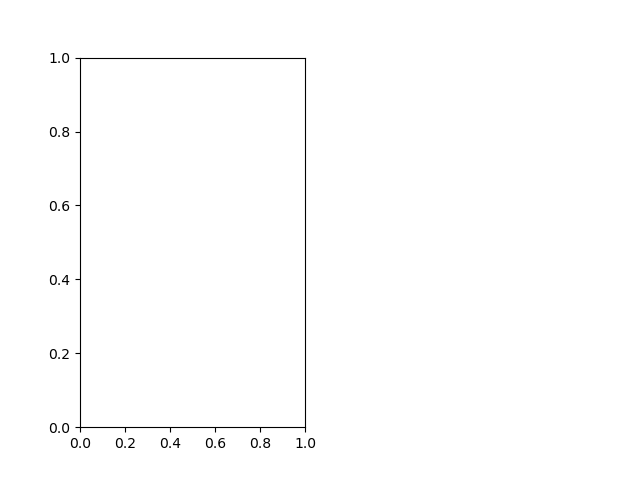

True

In [9]:
plt.figure()
plt.subplot(1, 2, 1) == plt.subplot(121)
#lists start in position 1 instead of 0

<IPython.core.display.Javascript object>


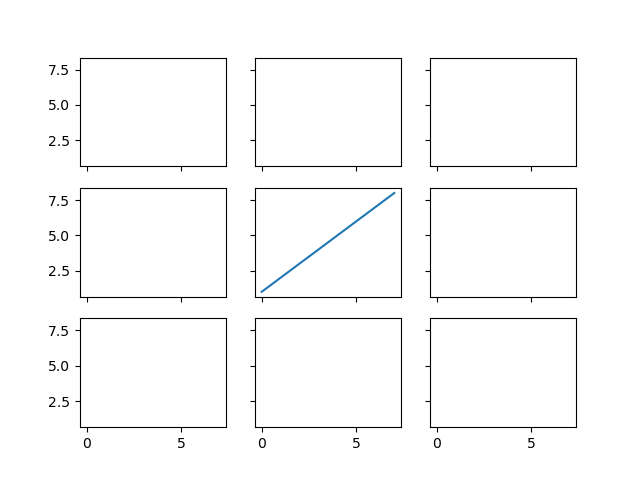

In [10]:
#to get a 3x3 grid
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3,
                                                                   sharex=True,
                                                                   sharey=True)
ax5.plot(linear_data, '-')

In [11]:
#turning the labels on, iterating through the axes
for ax in plt.gcf().get_axes():
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_visible(True)

In [12]:
plt.gcf().canvas.draw() #if the change isn't applied

<IPython.core.display.Javascript object>


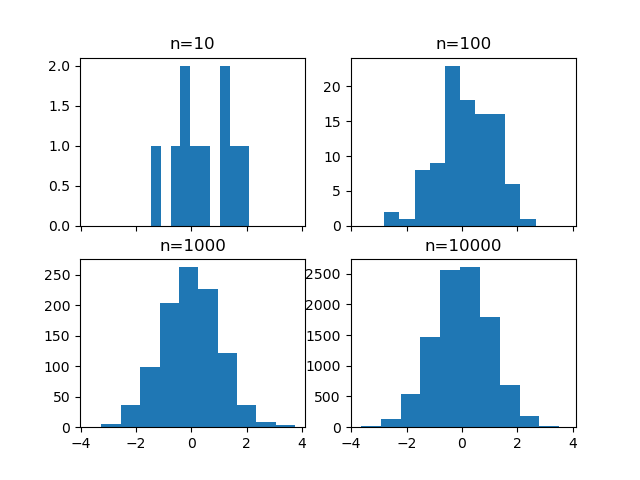

In [13]:
#---Histograms---
#a comparison in sample sizes from 10 to 10,000
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs=[ax1,ax2,ax3,ax4]

for n in range(0, len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


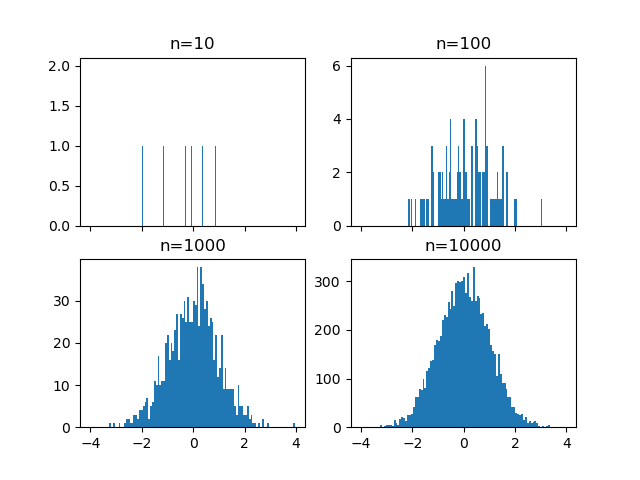

In [14]:
#same function with bin set to 100, by default it used 10 bins
#depending on n, the bin size is important to have a sample in its own bin
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs=[ax1,ax2,ax3,ax4]

for n in range(0, len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample, bins=100)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


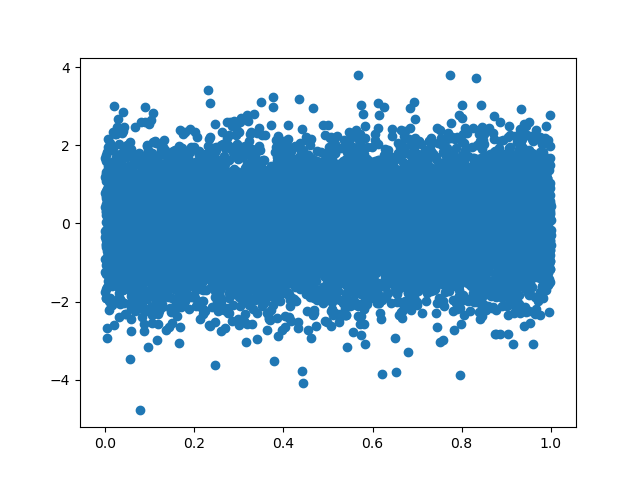

In [15]:
#scatter plot with X values with a random distribution and Y with normal
plt.figure()
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
plt.scatter(X,Y)

<IPython.core.display.Javascript object>


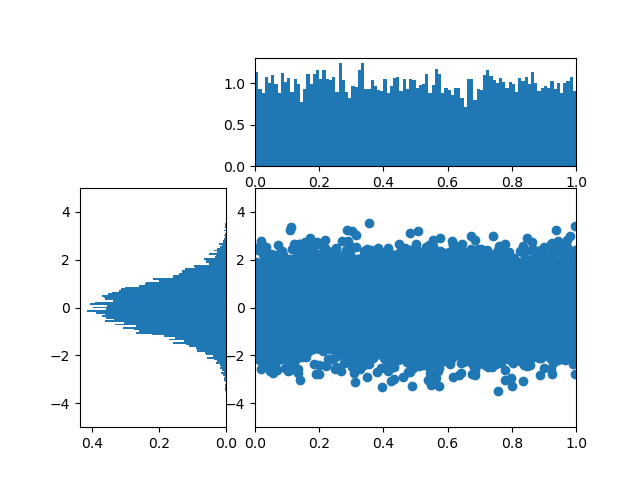

In [16]:
#defining a 3x3 grid with 9 cells in total, first histogram in top right space and second in far left bottom and the scatter 
#can take a 2x2 square in the bottom right
import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

In [17]:
#filling with data
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
lower_right.scatter(X, Y)
top_histogram.hist(X, bins=100)
s = side_histogram.hist(Y, bins=100, orientation='horizontal')

In [18]:
#to create a new figure
top_histogram.clear()
top_histogram.hist(X, bins=100, normed=True)
side_histogram.clear()
side_histogram.hist(Y, bins=100, orientation='horizontal', normed=True)

side_histogram.invert_xaxis()

In [20]:
for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 1)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-5, 5)

In [21]:
#---Box Plots---
import pandas as pd
normal_sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

df = pd.DataFrame({'normal': normal_sample,
                  'random': random_sample,
                  'gamma': gamma_sample})

In [22]:
#to see summary statistics on the df, we use the describe funtion
df.describe()

,normal,random,gamma
count,10000.000000,10000.000000,10000.000000
mean,0.001045,0.503526,2.001355
std,1.013268,0.286570,1.402035
min,-4.564679,0.000009,0.029145
25%,-0.684175,0.253622,0.970549
50%,-0.001511,0.509104,1.681252
75%,0.678798,0.752354,2.703294
max,3.684126,1.000000,11.318198


<IPython.core.display.Javascript object>


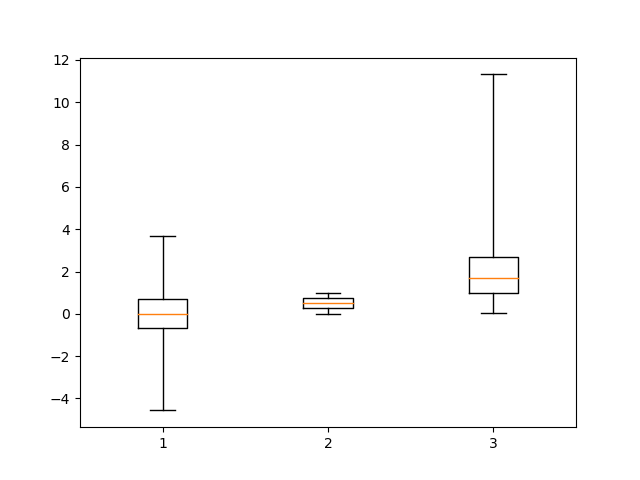

In [23]:
#the % values make up the interquartile range
#in a box plot the mean of median of the data is plotted as a straight line
plt.figure()
_ = plt.boxplot(df['normal'], whis='range') #people use _ as a varible to unpack values to use later

In [24]:
plt.clf()
_ = plt.boxplot([df['normal'], df['random'], df['gamma'] ], whis='range')

<IPython.core.display.Javascript object>


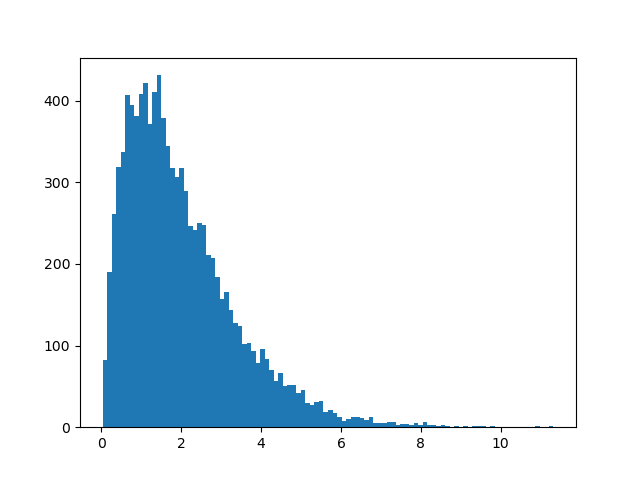

In [25]:
#a look in a histogram
plt.figure()
_ = plt.hist(df['gamma'], bins=100)

<IPython.core.display.Javascript object>


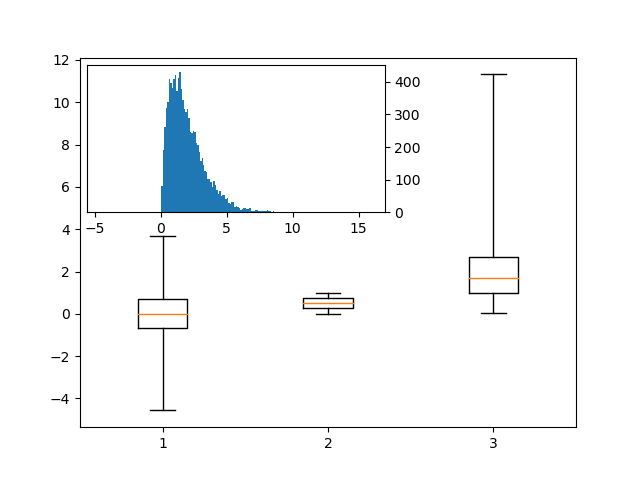

In [26]:
#adding the histogram to the boxplot
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

plt.figure()
plt.boxplot([df['normal'], df['random'], df['gamma']], whis='range')
ax2 = mpl_il.inset_axes(plt.gca(), width='60%', height='40%', loc=2)
ax2.hist(df['gamma'], bins=100)
ax2.margins(x=0.5)

In [27]:
#fixing the y axis clash
ax2.yaxis.tick_right()

<IPython.core.display.Javascript object>


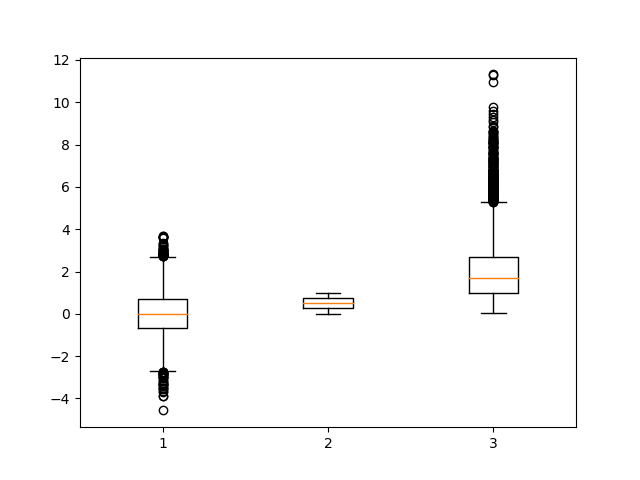

In [28]:
#the boxplot has other functions, if you don't supply the whis argument it will go half way in the IQR
plt.figure()
_ = plt.boxplot([df['normal'], df['random'], df['gamma']])

<IPython.core.display.Javascript object>


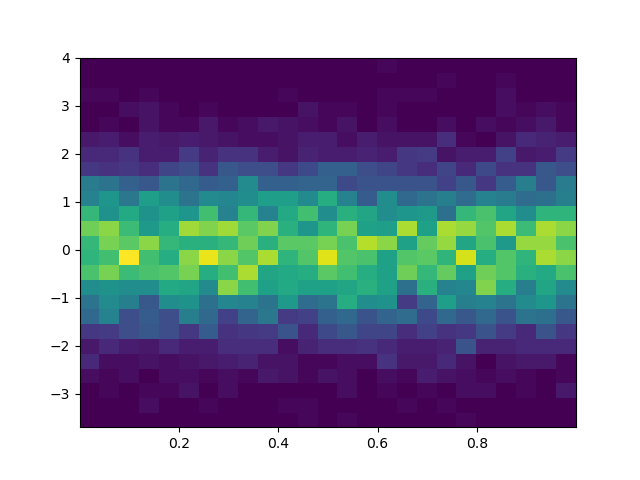

In [29]:
#---Heatmaps---
plt.figure()

Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
_ = plt.hist2d(X, Y, bins=25)

<IPython.core.display.Javascript object>


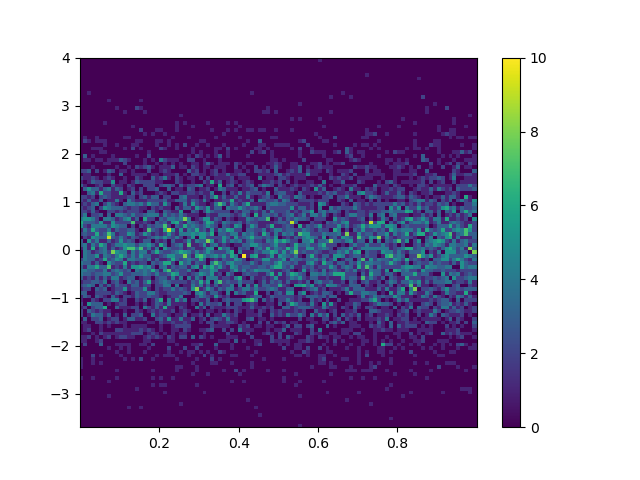

In [30]:
#increasing the number of bins to see what happens
plt.figure()
_ = plt.hist2d(X, Y, bins=100)

In [31]:
plt.colorbar() #equivalent to what legends ar for line graphs

In [32]:
#---Animations---
import matplotlib.animation as animation

n = 100
x = np.random.randn(n)

In [33]:
#function to do the plotting
def update(curr):
    if curr == n:
        a.event_source.stop()
    plt.cla()
    bins = np.arange(-4, 4, 0.5) #we can space a spacing between bins
    plt.hist(x[:curr], bins=bins)
    plt.axis([-4, 4, 0, 30])
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3,27])

<IPython.core.display.Javascript object>


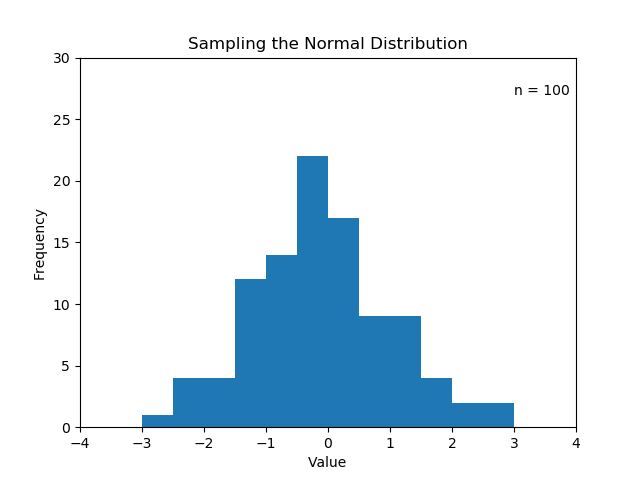

In [34]:
#generating a new figure and calling the animation constructor
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=100) #a makes the function to know when to stop the animation

<IPython.core.display.Javascript object>


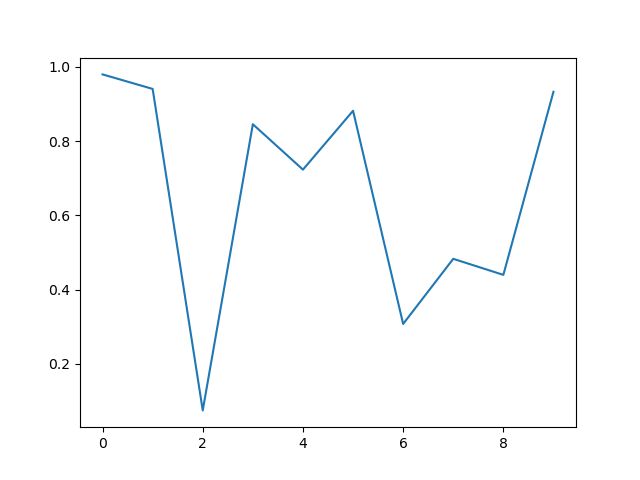

7

In [35]:
#---Interactivity---
plt.figure()
data = np.random.rand(10)
plt.plot(data)

def onclick(event):
    plt.cla()
    plt.plot(data)
    plt.gca.get_title('Event at pixels {},{} {}and data {},{}'.format(event.x,
                                                                     event.y,
                                                                     '\n',
                                                                     event.xdata,
                                                                     event.ydata))
#wiring to an event listener
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

In [36]:
#example of a pick event, when the user has clicked an element
from random import shuffle
origins = ['China', 'Brazil', 'India', 'USA', 'Canada',
          'UK', 'Germany', 'Iraq', 'Chile', 'Mexico']

shuffle(origins)

df = pd.DataFrame({'height': np.random.rand(10),
                  'weight': np.random.rand(10),
                  'origin': origins})
df

,height,weight,origin
0,0.460783,0.661526,India
1,0.681212,0.408827,Iraq
2,0.480312,0.871187,Germany
3,0.868125,0.707834,Mexico
4,0.414060,0.956597,Chile
5,0.836376,0.527663,UK
6,0.370898,0.832866,Brazil
7,0.153765,0.150117,China
8,0.122267,0.291684,USA
9,0.275213,0.031919,Canada


<IPython.core.display.Javascript object>


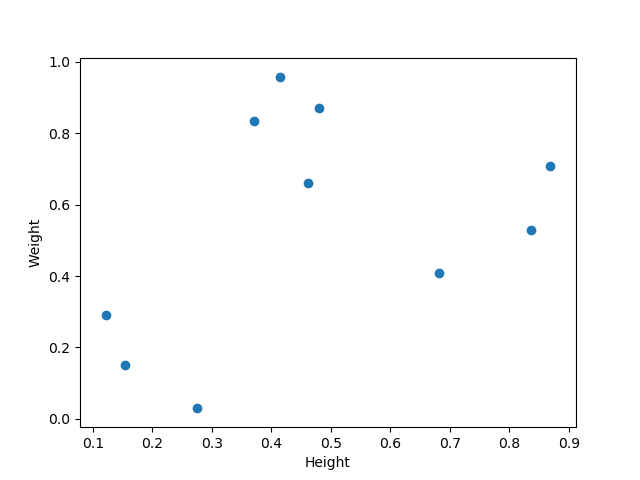

Text(0.5, 0, 'Height')

In [37]:
plt.figure()
plt.scatter(df['height'], df['weight'], picker=5)
plt.gca().set_ylabel('Weight')
plt.gca().set_xlabel('Height')

In [38]:
#wiring it up
def onpick(event):
    origin = df.iloc[event.ind[0]]['origin']
    plt.gca().set_title('Selected item came from {}'.format(origin))
plt.gcf().canvas.mpl_connect('pick_event', onpick)

7